Script to calculate the in-plane IFC of any material (MoO3 as example). Based on 2D conductivity layer approximation.

# Open the packages for the script

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Define the function of the permittivity of MoO3
Parameters from paper: https://onlinelibrary.wiley.com/doi/abs/10.1002/adma.201908176

In [3]:
def eps_harm_Osc(w, wT, wL, gamma):
    eps_h = (w*w-wL**2+1j*gamma*w)/(w*w-wT**2+1j*gamma*w)
    return eps_h


In [4]:
def eps_MoO3(w, axis):
    if(axis=='[100]'): # x-axis of MoO3
        epsinf = 6.09
        gamma = np.array([[73, 11.9, 2.1]])
        wTO = np.array([[507, 822.7, 998.8]])
        wLO = np.array([[534, 978.8, 999.5]])

    if(axis=='[001]'): # z-axis of MoO3
        epsinf = 6.38
        gamma = np.array([[17.9]])
        wTO = np.array([[544.9]])
        wLO = np.array([[855.8]])

    if(axis=='[010]'): # y-axis of MoO3
        epsinf = 4.4
        gamma = np.array([[0.7]])
        wTO = np.array([[963]])
        wLO = np.array([[1006.6]])

    eps = np.ones(np.shape(w)[0],)
    for i in range(np.shape(wTO)[1]):
        eps = eps*eps_harm_Osc(w,wTO[0,i],wLO[0,i],gamma[0,i])

    eps = epsinf*eps

    return eps

# Calculate the in-plane IFC
Formula from the article: https://www.nature.com/articles/s41586-018-0618-9

In [5]:
# Inputs:

w = np.array([[870]]) # Frequency in cm^-1
e2 = 2.7 # Permittivity of the substrate
e1 = 1 # Permittivity of the superstrate
t = 0.1 # Thickness of the layer, in um
maxK = 50 # Max momentum ploted, in um^-1
nK = 500 # Partition in momentum

# Script:

# Momentum and wavelength
kx = np.linspace(-maxK,maxK,nK)
ky = kx
lam = 10**4/w
k0 = 2*np.pi/lam

# Permittivity of the material
epsx = eps_MoO3(w, '[100]')
epsy = eps_MoO3(w, '[001]')

# Effective conductivity of the material
alfx=np.pi*t/(1j*lam)*epsx
alfy=np.pi*t/(1j*lam)*epsy

# Initialization of the loop
Z = np.zeros((nK,nK))+0j

# Loops in momentum

for i in range(nK):
    for j in range(nK):

        # Momentum
        kt=np.array([[kx[i]+0j,ky[j]+0j]])
        k1z=np.sqrt(e1*k0**2-np.vdot(kt,kt))
        k2z=np.sqrt(e2*k0**2-np.vdot(kt,kt))

        # Diagonal elements
        T1 = ky[j]**2*alfx+kx[i]**2*alfy+np.vdot(kt,kt)/(2*k0)*(k1z+k2z)
        T2 = kx[i]**2*alfx+ky[j]**2*alfy+k0*np.vdot(kt,kt)/2*(e1/k1z+e2/k2z)

        # Determinant of the matrix
        Z[j,i] = T1*T2-ky[j]**2*kx[i]**2*(alfy-alfx)**2

C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_18848\2579424578.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[j,i] = T1*T2-ky[j]**2*kx[i]**2*(alfy-alfx)**2


# Plot the IFC of the material

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_18848\4030234277.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$k_x (\mu m^{-1})$")
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_18848\4030234277.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$k_y (\mu m^{-1})$")


Text(0, 0.5, '$k_y (\\mu m^{-1})$')

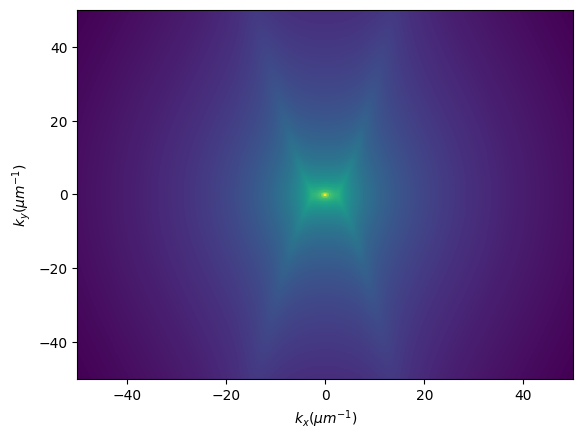

In [6]:
plt.pcolor(kx,ky,-np.log(np.abs(Z)))
plt.xlabel("$k_x (\mu m^{-1})$")
plt.ylabel("$k_y (\mu m^{-1})$")

Text(0, 0.5, '$q_y$')

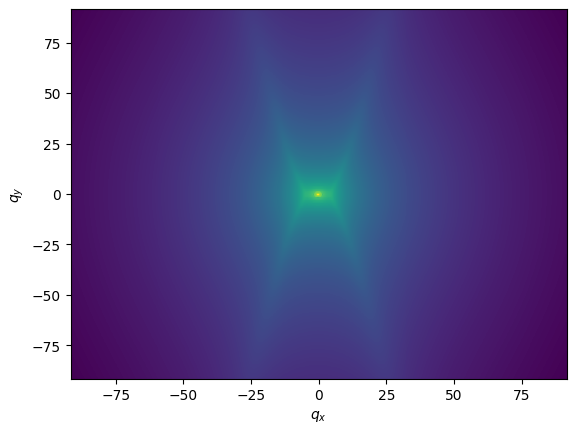

In [7]:
plt.pcolor(kx/k0[0,0],ky/k0[0,0],-np.log(np.abs(Z)))
plt.xlabel("$q_x$")
plt.ylabel("$q_y$")